<a href="https://colab.research.google.com/github/rajusuthar/ML-Classification-project-/blob/main/Copy_of_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [ ]:
 #moutning drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libreary or package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#creating directory path of csv file
dir_path='/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
#reading data
Tele_df=pd.read_csv(dir_path)

In [ ]:
#let's see how our data look like
Tele_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#let's check info
Tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#we seen that there is no null value in our dataframe

#Now let's check for duplticate value bcz in logistics regression we want all all value should have independent measurement

In [ ]:
#droppping duplicate value if any 
Tele_df.drop_duplicates(subset='customerID',keep=False,inplace=True)

In [ ]:
my_list=list(Tele_df.columns)

In [ ]:
my_list.remove('customerID')
my_list.remove('tenure')
my_list.remove('TotalCharges')
my_list.remove('MonthlyCharges')


In [ ]:
my_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

#We have tenure and monthly charges as numerical value so lets see there box plot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


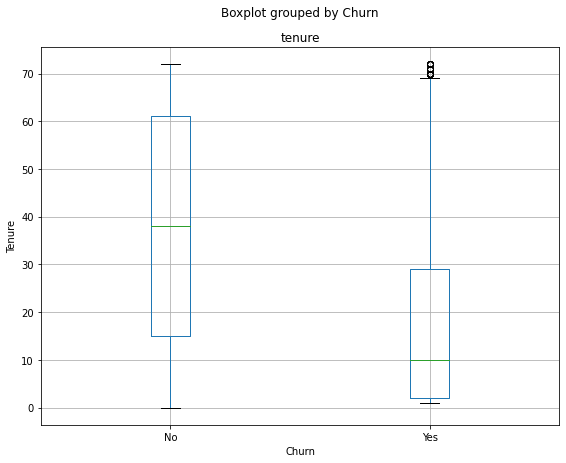

In [ ]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca()
Tele_df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


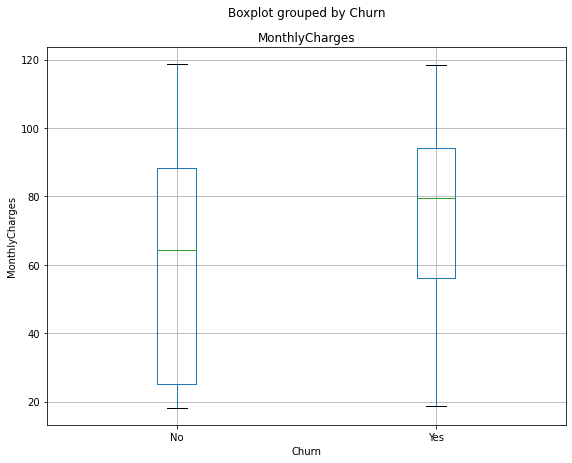

In [ ]:
fig = plt.figure(figsize=(9, 7))
ax = fig.gca()
Tele_df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

#Above both box plot shows us that less the tenure and more monthly charge then there are more churn 

In [ ]:
Tele_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#We have many categorical column in dataframe so let's see how these column are distributed using bar plot

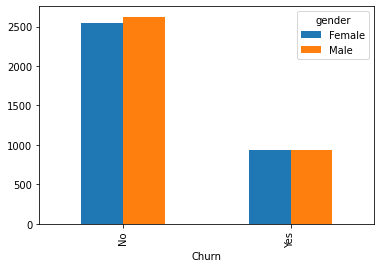

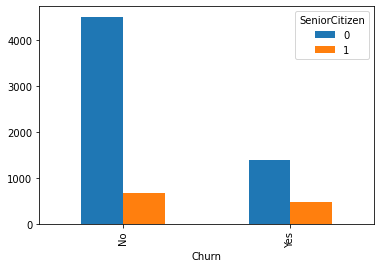

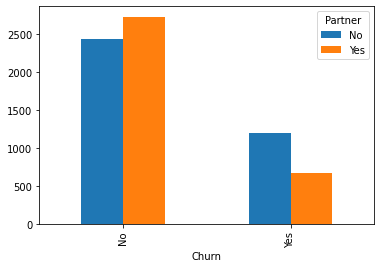

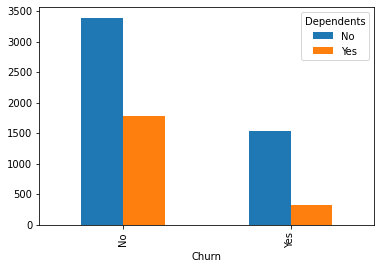

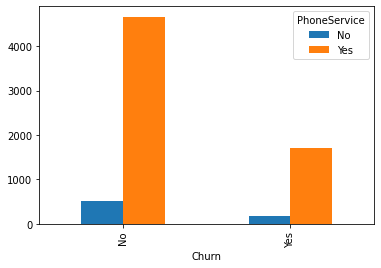

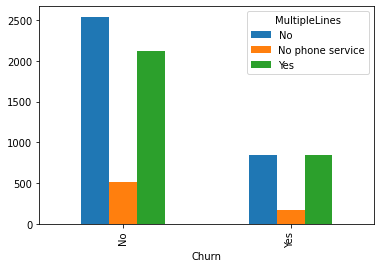

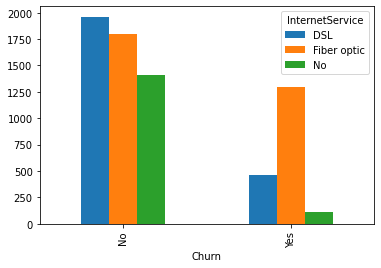

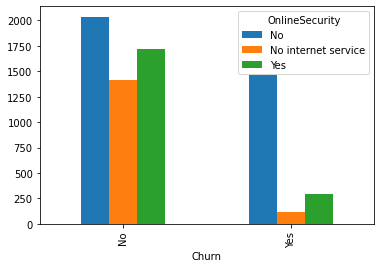

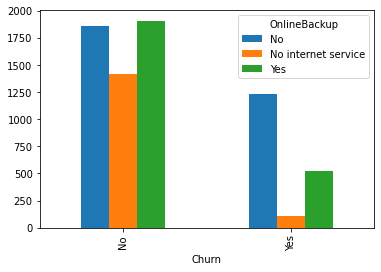

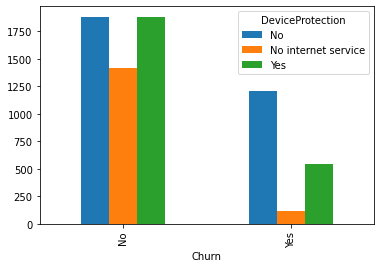

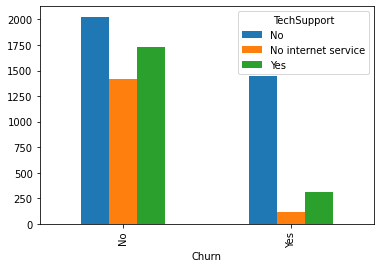

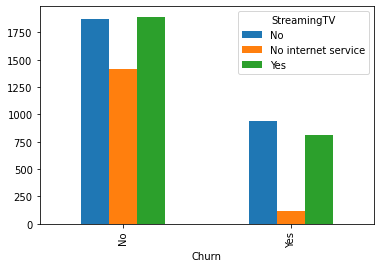

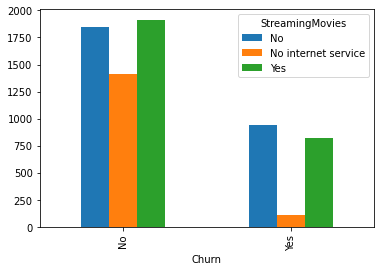

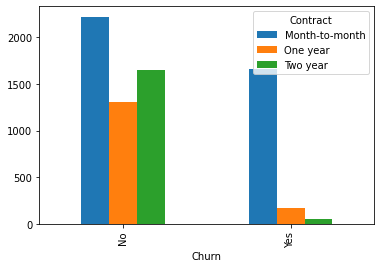

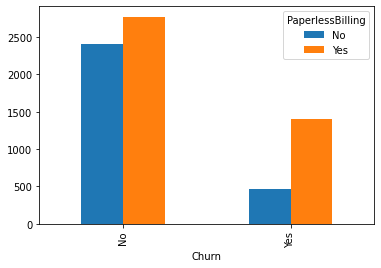

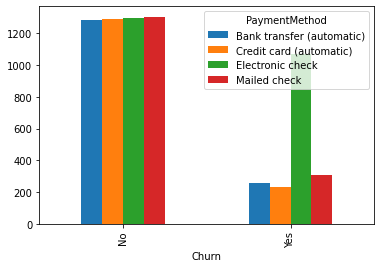

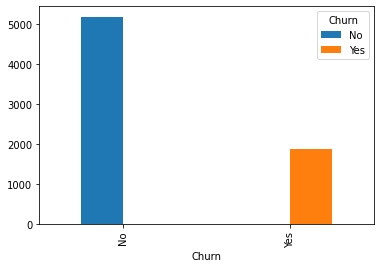

In [ ]:
for col in my_list:
  df=Tele_df.groupby('Churn')[col].value_counts().unstack()
  df.plot(kind='bar')

#We have seen from above bar chart that how our value of categorical is distributed over churn ,so now lets replace these value with numeric 

In [ ]:
#dropping customer id 
Tele_df.drop('customerID',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

#let's do label encoding to all categorical value

In [ ]:
Tele_df['gender']=label_encoder.fit_transform(Tele_df.gender)
Tele_df['SeniorCitizen']=label_encoder.fit_transform(Tele_df.SeniorCitizen)
Tele_df['Partner']=label_encoder.fit_transform(Tele_df.Partner)
Tele_df['Dependents']=label_encoder.fit_transform(Tele_df.Dependents)
Tele_df['PhoneService']=label_encoder.fit_transform(Tele_df.PhoneService)
Tele_df['MultipleLines']=label_encoder.fit_transform(Tele_df.MultipleLines)
Tele_df['InternetService']=label_encoder.fit_transform(Tele_df.InternetService)
Tele_df['OnlineSecurity']=label_encoder.fit_transform(Tele_df.OnlineSecurity)
Tele_df['OnlineBackup']=label_encoder.fit_transform(Tele_df.OnlineBackup)
Tele_df['DeviceProtection']=label_encoder.fit_transform(Tele_df.DeviceProtection)
Tele_df['TechSupport']=label_encoder.fit_transform(Tele_df.TechSupport)
Tele_df['StreamingTV']=label_encoder.fit_transform(Tele_df.StreamingTV)
Tele_df['StreamingMovies']=label_encoder.fit_transform(Tele_df.StreamingMovies)
Tele_df['Contract']=label_encoder.fit_transform(Tele_df.Contract)
Tele_df['PaperlessBilling']=label_encoder.fit_transform(Tele_df.PaperlessBilling)
Tele_df['PaymentMethod']=label_encoder.fit_transform(Tele_df.PaymentMethod)
Tele_df['Churn']=label_encoder.fit_transform(Tele_df.Churn)

In [ ]:
#converting all value of dataframe to int or float
Tele_df = Tele_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
Tele_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
Tele_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
Tele_df.dropna(inplace=True)

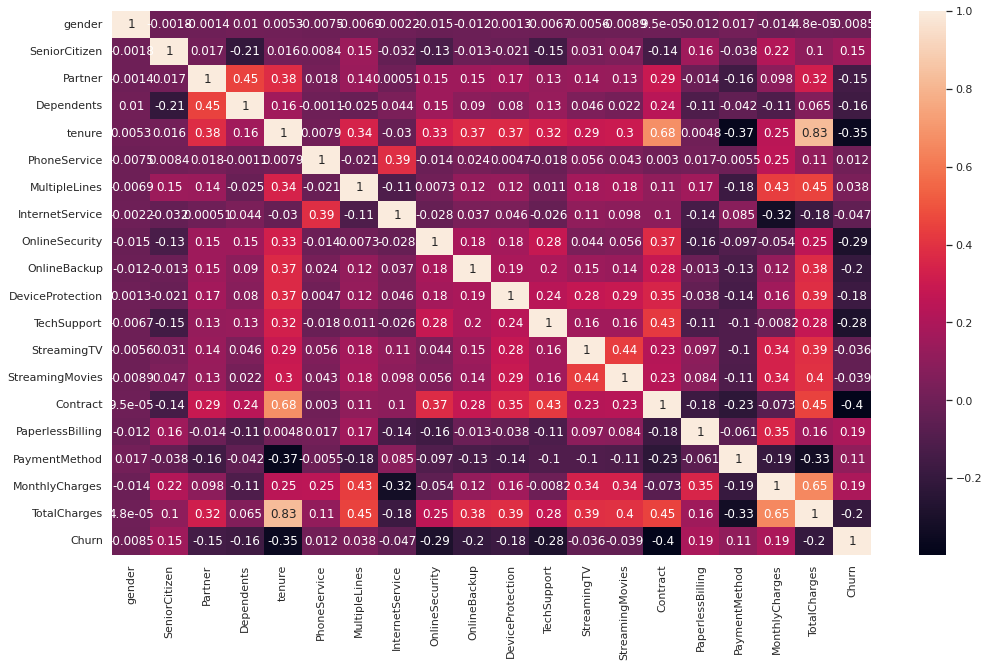

In [ ]:
sns.set(rc = {'figure.figsize':(17,10)})
sns.heatmap(data=Tele_df.corr(),annot=True)

#While building a logistics model we always take care of multicollinearity ,
#From the above heatmap we can see that tenure and totel charge is highly correlated so we can drop tenure

#Even these thing we can also see from bar chart 

In [27]:
new_tele_df=Tele_df.drop(['tenure'],axis=1)

In [28]:
new_tele_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [29]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [34]:
calc_vif(new_tele_df)

,variables,VIF
0,gender,1.928405
1,SeniorCitizen,1.365826
2,Partner,2.749972
3,Dependents,1.956724
4,PhoneService,14.727679
5,MultipleLines,2.702349
6,InternetService,4.358483
7,OnlineSecurity,2.241588
8,OnlineBackup,2.445146
9,DeviceProtection,2.629173


#In varience inflation vector we see that monthly charges and phoneservices has vif greater than 10 so lets remove phoneservice bcz this variable is less related with our dependent variable

In [35]:
new_tele_df.drop(['PhoneService'],axis=1,inplace=True)

In [36]:
calc_vif(new_tele_df)

,variables,VIF
0,gender,1.914918
1,SeniorCitizen,1.363973
2,Partner,2.744302
3,Dependents,1.951710
4,MultipleLines,2.650505
5,InternetService,2.540893
6,OnlineSecurity,2.213581
7,OnlineBackup,2.443400
8,DeviceProtection,2.627345
9,TechSupport,2.376616


#Monthly charges vif is still greater than 10 ,we can also drop this as well

In [37]:
new_tele_df.drop(['MonthlyCharges'],axis=1,inplace=True)

In [38]:
calc_vif(new_tele_df)

,variables,VIF
0,gender,1.872368
1,SeniorCitizen,1.349017
2,Partner,2.740832
3,Dependents,1.949323
4,MultipleLines,2.535964
5,InternetService,2.536754
6,OnlineSecurity,2.201740
7,OnlineBackup,2.439228
8,DeviceProtection,2.616390
9,TechSupport,2.363700


#Now our data is ready to fit in our model so let's train our model

In [39]:
X=new_tele_df[['gender','SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','PaymentMethod','Contract','TotalCharges','StreamingMovies','StreamingTV']].copy()
y=new_tele_df[['Churn']].copy()

In [43]:
#splitting our dataset into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
print(x_train.shape)
print(x_test.shape)


(5625, 16)
(1407, 16)


In [45]:
y_train.value_counts()

Churn
0        4125
1        1500
dtype: int64

In [46]:
y_test.value_counts()

Churn
0        1038
1         369
dtype: int64

In [47]:
#fitting our model 
regressor=LogisticRegression(fit_intercept=True,max_iter=10000)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
#printing cofficient 
regressor.coef_

array([[-7.95700895e-02,  3.48574429e-01, -9.58669275e-02,
        -2.92539775e-01,  1.87381390e-01, -3.02029078e-02,
        -3.25800934e-01, -1.97373433e-01, -4.75186189e-02,
        -3.05077084e-01,  5.13282232e-01,  1.38727441e-02,
        -1.21641811e+00, -1.24333830e-04,  1.50482589e-01,
         1.23358988e-01]])

In [49]:
#printing intercept
regressor.intercept_

array([-0.32309014])

In [50]:
# Get the predicted probabilities
train_preds = regressor.predict_proba(x_train)
test_preds = regressor.predict_proba(x_test)

In [51]:
#predicting value
train_pred = regressor.predict_proba(x_train)[:,1]
test_pred = regressor.predict_proba(x_test)[:,1]

In [52]:
test_pred 

array([0.26118539, 0.35918556, 0.27408125, ..., 0.51694496, 0.05349256,
       0.58839458])

In [53]:
# Get the predicted classes
train_class_preds = regressor.predict(x_train)
test_class_preds = regressor.predict(x_test)

In [54]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7799111111111111
The accuracy on test data is  0.7860696517412935


[[3697  428]
 [ 810  690]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

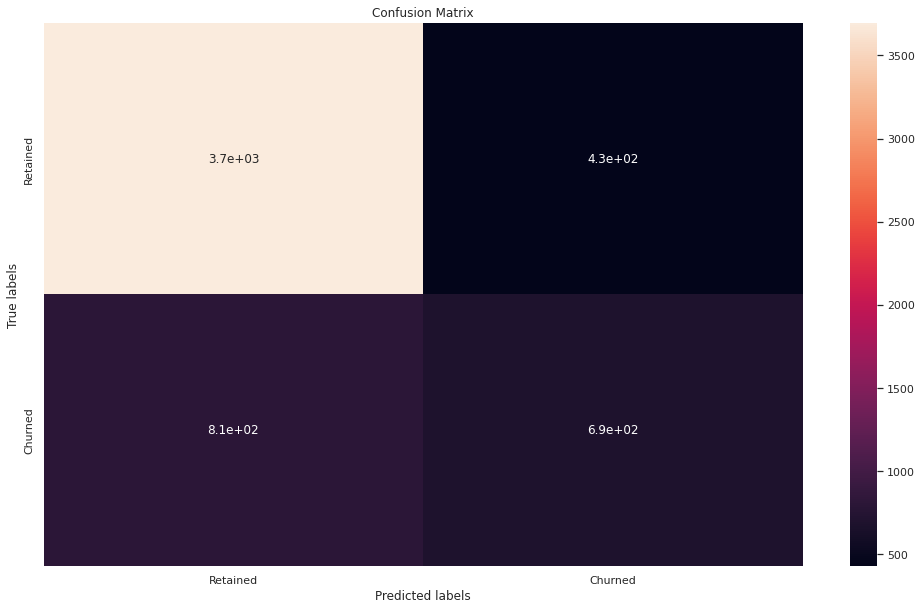

In [56]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[936 102]
 [199 170]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

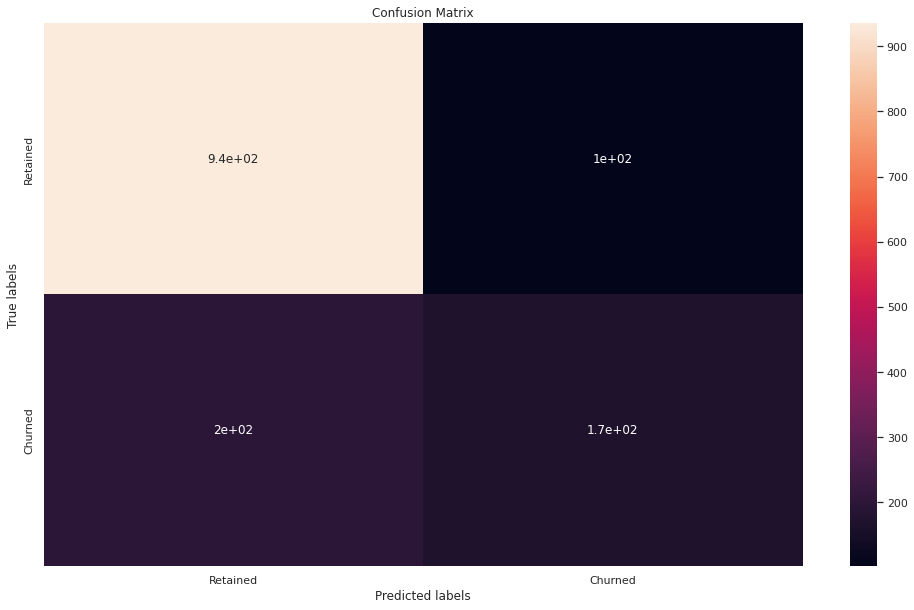

In [57]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [58]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score= roc_auc_score(y_test, test_preds[:,1])


print(auc_score)

0.8184555978507762


#Higher the AUC ,better the classifier model ,in our model model AUC is .81

In [59]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, test_preds[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

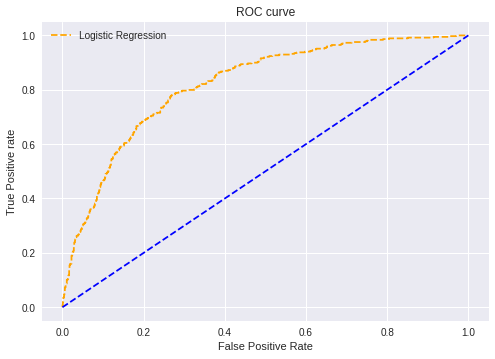

In [60]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#AUC_ROC curve used to measure the performance of our classification model

#for example if i talk about logistic regression curve then at FPR 1.0 ,we have high true positive rate as well as high false positive rate but at FPR=0.8 ,we have similer TPR but decreased fpr so for us its best value for us to make where our model performing well